In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style



In [3]:
heart=pd.read_csv("heart.csv")

In [4]:
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [5]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
heart.shape

(303, 14)

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart.isnull().sum()
#the data does not have null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart[heart["target"]==1]
#165 people have chances for heart attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
ha_df=heart["target"].value_counts()

In [12]:
ha_df

1    165
0    138
Name: target, dtype: int64

<Axes: ylabel='target'>

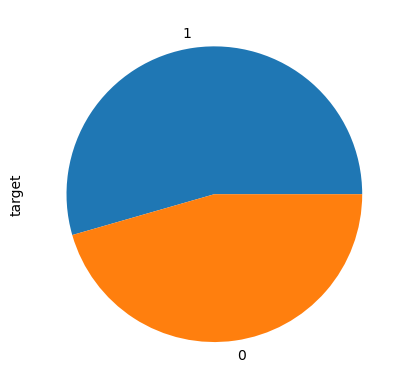

In [14]:
ha_df.plot(kind="pie")
#more than 50% have heart attack

In [15]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [20]:
cor_df=heart.corr()
cor_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


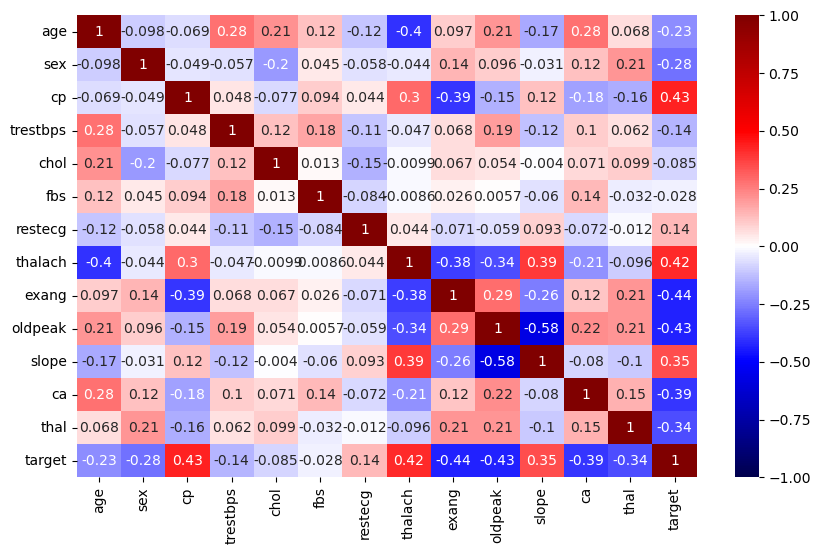

In [21]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    data=cor_df,
    vmin=-1,
    vmax=1,
    center=0,
    cmap='seismic',
    annot=True
)

plt.show()

In [17]:
sdf=heart["sex"].value_counts()
sdf

1    207
0     96
Name: sex, dtype: int64

<Axes: ylabel='sex'>

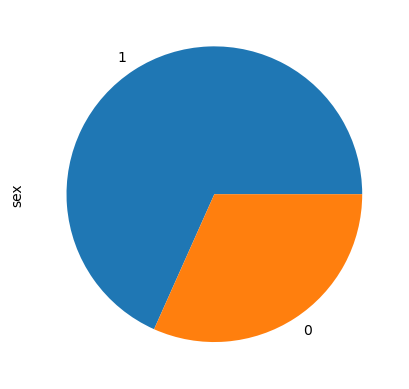

In [18]:
sdf.plot(kind="pie")

In [19]:
#1 indicated to men , they are more likely to get heart attack

In [22]:
heart1=heart[heart["target"]==1]
heart0=heart[heart["target"]==0]

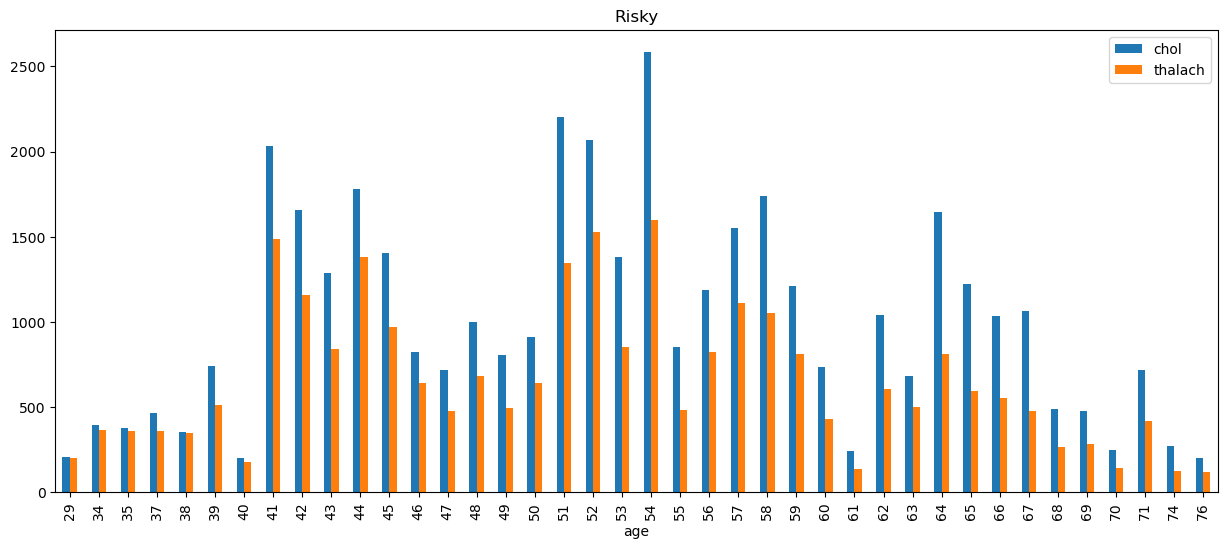

In [25]:
age_1=heart1.groupby("age")[['chol', 'thalach']].sum()
age_1.plot(kind='bar', figsize=(15, 6), title='Risky')
plt.show()

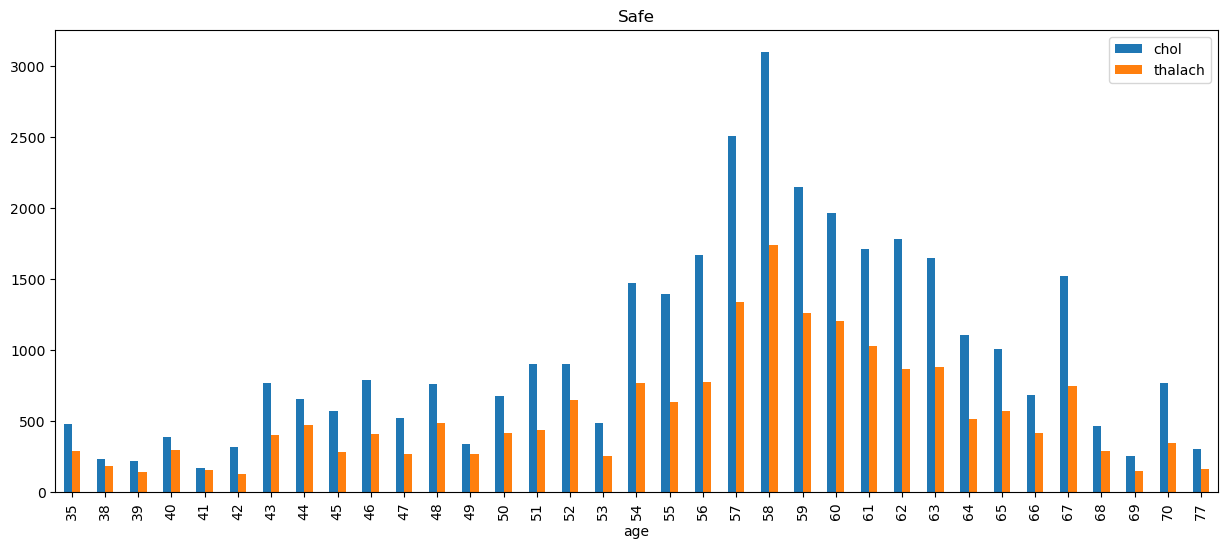

In [27]:
age_0 = heart0.groupby(by=['age'])[['chol', 'thalach']].sum()
age_0.plot(kind='bar', figsize=(15, 6), title='Safe')
plt.show()

## Chest Pain - group by

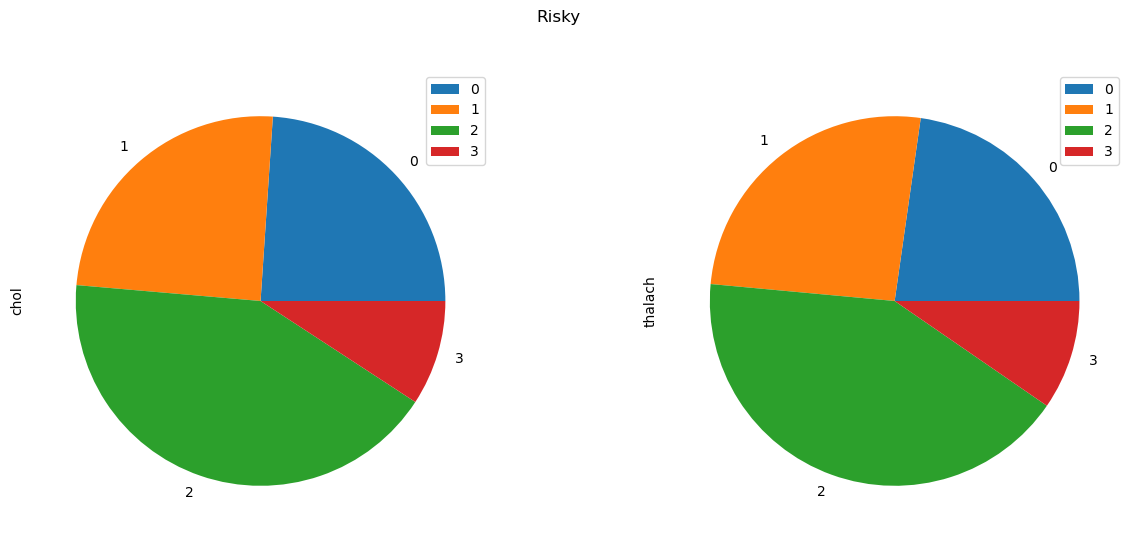

In [28]:
cp_df_1 = heart1.groupby(by=['cp'])[['chol', 'thalach']].sum()
cp_df_1.plot(kind='pie', figsize=(15, 6), subplots=True, title='Risky')
plt.show()

In [29]:
heart["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

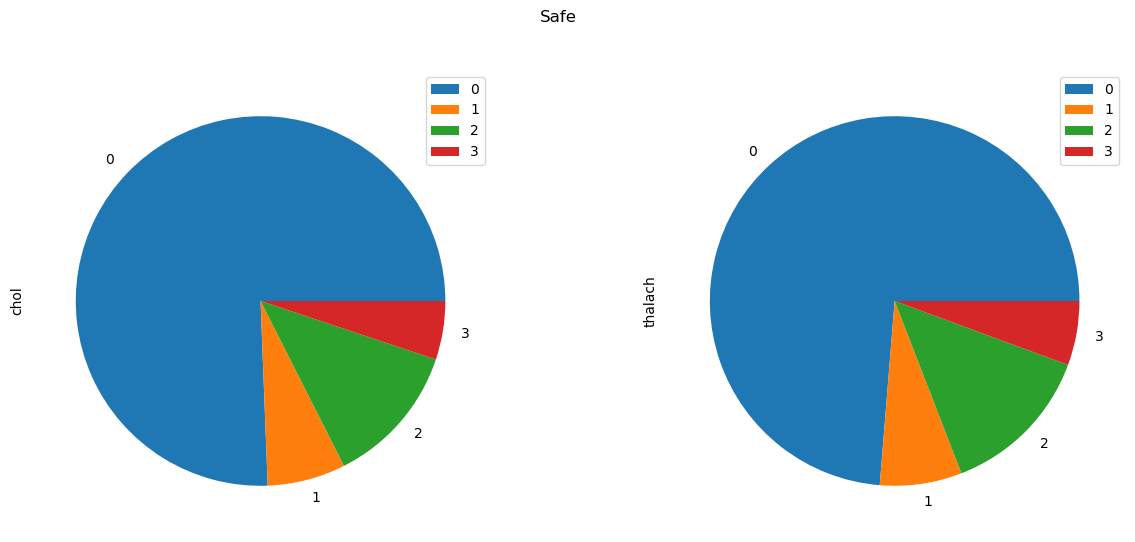

In [30]:
cp_df_0 = heart0.groupby(by=['cp'])[['chol', 'thalach']].sum()
cp_df_0.plot(kind='pie', figsize=(15, 6), subplots=True, title='Safe')
plt.show()

<Axes: xlabel='cp', ylabel='count'>

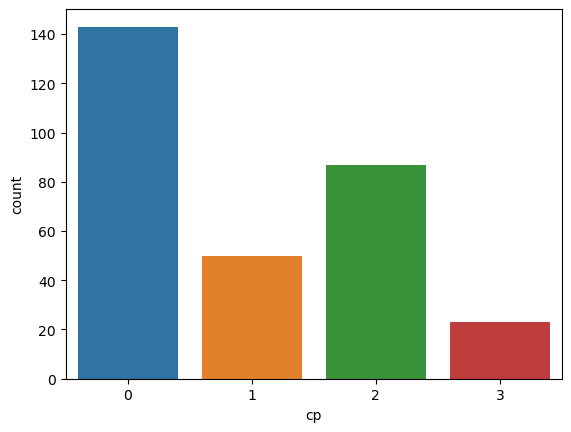

In [33]:
sns.countplot(x=heart["cp"])
#people with chest pain are less

## Role of cholestrol in Heart Stroke

In [35]:
heart1["chol"].min()

126

In [36]:
heart1[heart1["chol"]==126]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1


In [37]:
heart0["chol"].min()

131

In [38]:
heart0[heart0["chol"]==131]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
heart1["chol"].max()

564

In [41]:
heart1[heart1["chol"]==564]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [42]:
heart0["chol"].max()

409

In [43]:
heart0[heart0["chol"]==409]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [44]:
#By observing this, we can say that cp is one of the important features.

# Scatter plot - age and chol

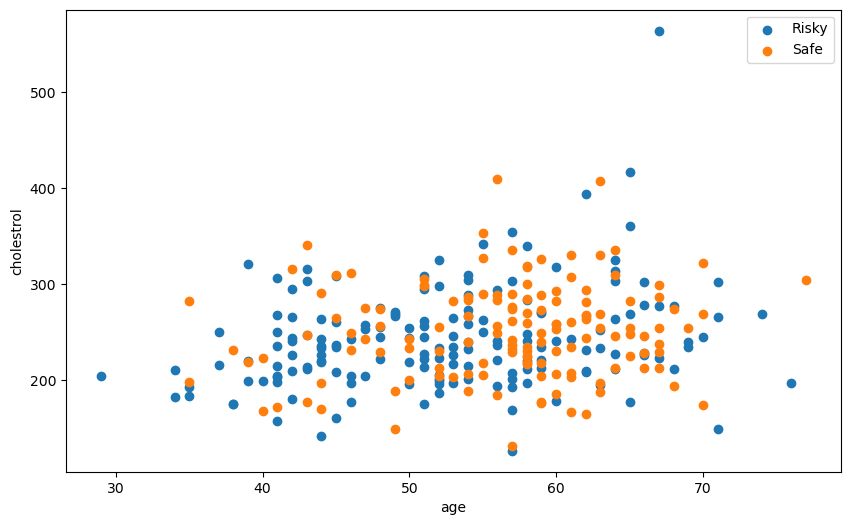

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(heart1['age'], heart1['chol'], label='Risky')
plt.scatter(heart0['age'], heart0['chol'], label='Safe')
plt.xlabel('age')
plt.ylabel('cholestrol')
plt.legend()
plt.show()

## Chest Pain - cp and Heart Rate - thalach

In [46]:
mxh_rate_1 = heart1['thalach'].max()
mih_rate_1 = heart1['thalach'].min()
mxh_rate_0 = heart0['thalach'].max()
mih_rate_0 = heart0['thalach'].min()

In [47]:
print("For 1, the max is → {}".format(mxh_rate_1))
print("For 0, the max is → {}".format(mxh_rate_0))
print('------------')
print("For 1, the min is → {}".format(mih_rate_1))
print("For 0, the min is → {}".format(mih_rate_0))

For 1, the max is → 202
For 0, the max is → 195
------------
For 1, the min is → 96
For 0, the min is → 71


In [48]:
heart1[heart1['thalach'] == mxh_rate_1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [49]:
heart1[heart1['thalach'] == mih_rate_1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1


In [50]:
heart0[heart0['thalach'] == mxh_rate_0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


From the above table, we can see that thalach is 195 which is higher.
The age of the person tends to be 54.
The cp is 1

In [51]:
heart0[heart0['thalach'] == mih_rate_0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


From the above table, we can see that thalach is 71 which is very optimal for person whose age is 67.
The cp is 0

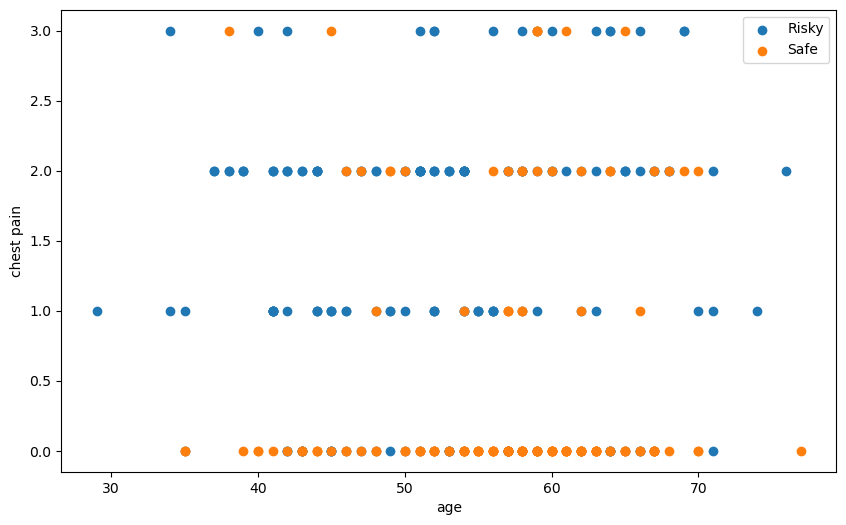

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(heart1['age'], heart1['cp'], label='Risky')
plt.scatter(heart0['age'], heart0['cp'], label='Safe')
plt.xlabel('age')
plt.ylabel('chest pain')
plt.legend()
plt.show()

In [53]:
#For a healthy person and healthy heart, irrespective of age the chest pain feature tends one of the important.

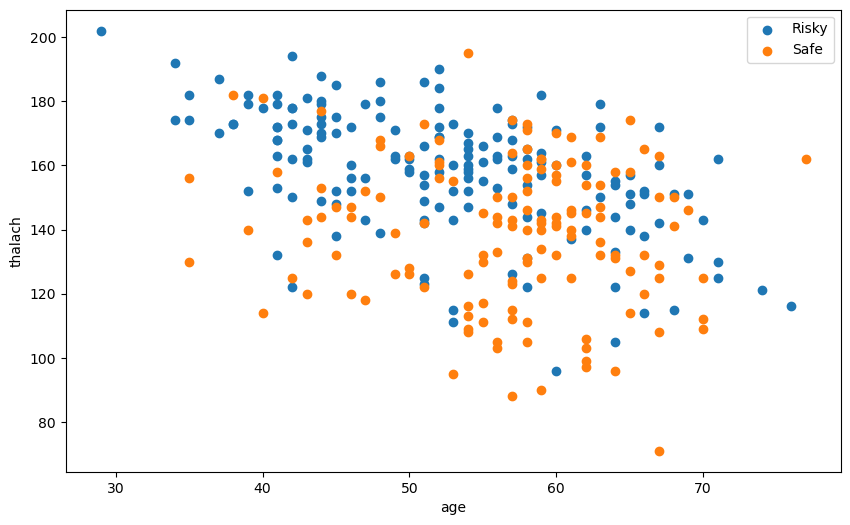

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(heart1['age'], heart1['thalach'], label='Risky')
plt.scatter(heart0['age'], heart0['thalach'], label='Safe')
plt.xlabel('age')
plt.ylabel('thalach')
plt.legend()
plt.show()

# Histogram

In [56]:
def plot_histogram(data1, data2, col_name, target_col):
    plt.figure(figsize=(10, 6))
    
    for i in [data1, data2]:
        label = 'Risky' if i[target_col].iloc[0] == 1 else 'Safe'
        plt.hist(i[col_name], label=label, alpha=0.5)
    plt.legend()
    plt.show()
    
    return None

# Density and Histogram plots

In [57]:
def plot_hist_density(data1, data2, col_name, target_col):
    plt.figure(figsize=(10, 6))
    
    for i in [data1, data2]:
        label = 'Risky' if i[target_col].iloc[0] == 1 else 'Safe'
        sns.distplot(i[col_name], hist=True, kde=True, label=label)
    plt.legend()
    plt.show()
    
    return None

# PDF and CDF

In [58]:
def plot_pdf_cdf(data1, data2, col_name, target_col):
    plt.figure(figsize=(10, 6))

    for i in [data1, data2]:
        counts, bin_edges = np.histogram(a=i[col_name], bins=10, density=True)
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        
        label = 'Risky' if i[target_col].iloc[0] == 1 else 'Safe'

        plt.plot(bin_edges[1:], pdf, label='Status {} - pdf'.format(label))
        plt.plot(bin_edges[1:], cdf, label='Status {} - cdf'.format(label))

    plt.xlabel(col_name)
    plt.legend()
    plt.show()
    
    return None

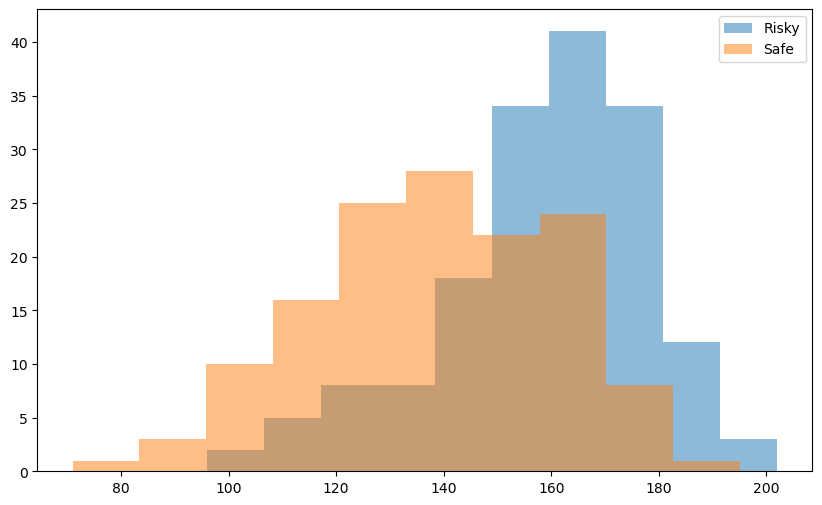

In [60]:
plot_histogram(data1=heart1, data2=heart0, col_name='thalach', target_col='target')

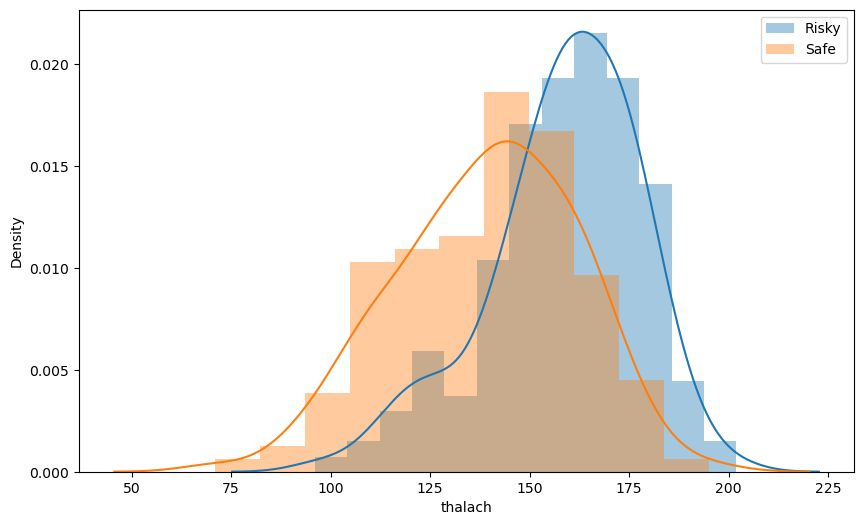

In [61]:
plot_hist_density(data1=heart1, data2=heart0, col_name='thalach', target_col='target')

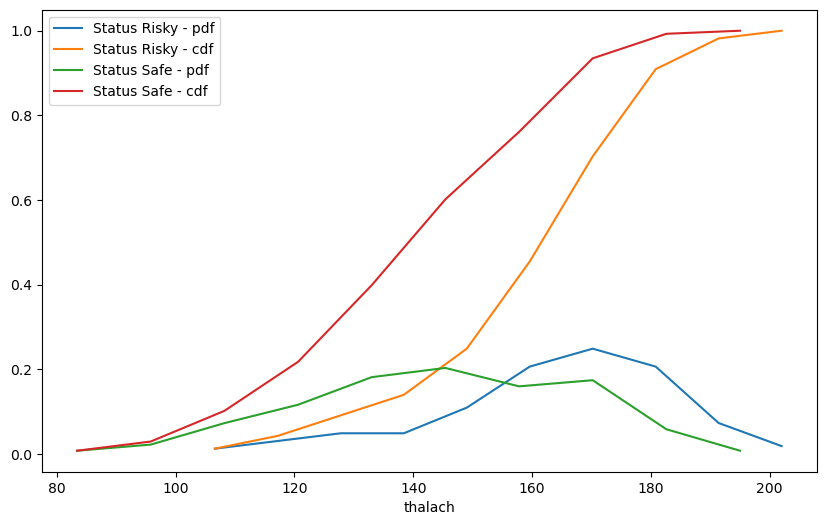

In [62]:
plot_pdf_cdf(data1=heart1, data2=heart0, col_name='thalach', target_col='target')

# statistical measurments

# mean

In [63]:
thalach_risky_mean = np.mean(heart1['thalach'])
thalach_safe_mean = np.mean(heart0['thalach'])

print("Risky →", thalach_risky_mean)
print("Safe →", thalach_safe_mean)

Risky → 158.46666666666667
Safe → 139.1014492753623


# median

In [64]:
thalach_risky_med = np.median(heart1['thalach'])
thalach_safe_med = np.median(heart0['thalach'])

print("Risky →", thalach_risky_med)
print("Safe →", thalach_safe_med)

Risky → 161.0
Safe → 142.0


# Standard deviation 

In [65]:
thalach_risky_std = np.std(heart1['thalach'])
thalach_safe_std = np.std(heart0['thalach'])

print("Risky →", thalach_risky_std)
print("Safe →", thalach_safe_std)

Risky → 19.116083449928922
Safe → 22.516753780200013


In [66]:
def compute_percentile(p, data):
    data = sorted(data)
    
    if (p == 100):
        return data[-1]
    
    l_p = (len(data) - 1) * (p / 100) + 1
    
    int_l_p = int(l_p)
    fl_l_p = l_p - int_l_p
    
    val1 = data[int_l_p - 1]
    val2 = data[int_l_p]    
    pval = val1 + (fl_l_p * (val2 - val1))
    
    return round(pval, 2)


In [69]:
print('--------------')
for d in ['heart1', 'heart0']:
    name = 'Risky' if d == 'heart1' else 'Safe'
    print(name)
    data = eval(d)['thalach'].to_list()
    for i in [0, 25, 75, 90, 95, 100]:
        perc = compute_percentile(p=i, data=data)
        print('\t{} \t→ {}'.format(i, perc))
    print('--------------')

--------------
Risky
	0 	→ 96.0
	25 	→ 149.0
	75 	→ 172.0
	90 	→ 179.6
	95 	→ 184.8
	100 	→ 202
--------------
Safe
	0 	→ 71.0
	25 	→ 125.0
	75 	→ 156.0
	90 	→ 166.6
	95 	→ 173.0
	100 	→ 195
--------------


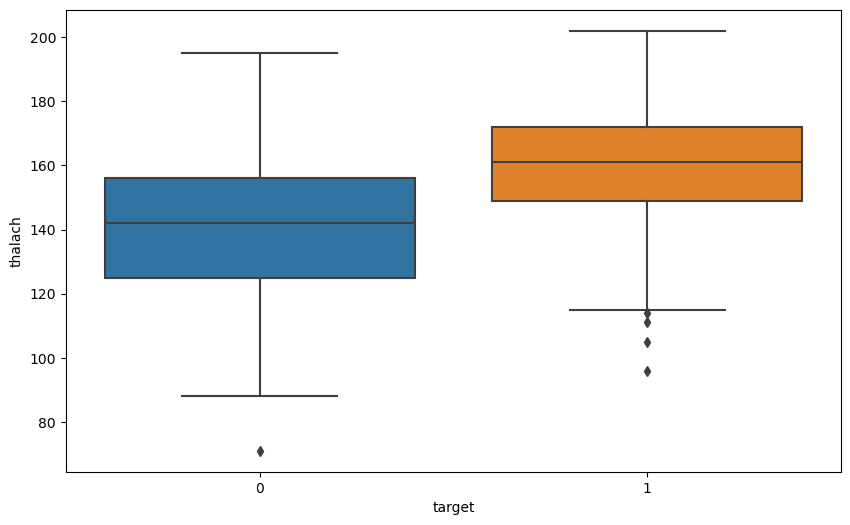

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target',y='thalach', data=heart)
plt.show()